In [1]:
pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data= yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-20,2.912832,3.028648,2.908349,2.972857,2.965574,213585582
2004-09-21,2.984065,2.999258,2.926780,2.934999,2.927809,145262446
2004-09-22,2.924040,2.980578,2.909345,2.948448,2.941225,152344894
2004-09-23,2.959906,3.054302,2.914575,3.009221,3.001849,171524515
2004-09-24,3.012209,3.090914,2.982820,2.984563,2.977252,183336625


In [6]:
google_data.shape

(5033, 6)

In [7]:
google_data.describe

<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-09-20    2.912832    3.028648    2.908349    2.972857    2.965574   
2004-09-21    2.984065    2.999258    2.926780    2.934999    2.927809   
2004-09-22    2.924040    2.980578    2.909345    2.948448    2.941225   
2004-09-23    2.959906    3.054302    2.914575    3.009221    3.001849   
2004-09-24    3.012209    3.090914    2.982820    2.984563    2.977252   
...                ...         ...         ...         ...         ...   
2024-09-11  151.089996  152.479996  148.699997  152.149994  152.149994   
2024-09-12  154.809998  155.610001  153.500000  155.539993  155.539993   
2024-09-13  156.362000  159.274994  156.110001  158.369995  158.369995   
2024-09-16  158.330002  159.240005  157.610001  158.990005  158.990005   
2024-09-17  160.089996  161.589996  159.410004  160.279999  160.279999   

   

In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-09-20 to 2024-09-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5033 non-null   float64
 1   High       5033 non-null   float64
 2   Low        5033 non-null   float64
 3   Close      5033 non-null   float64
 4   Adj Close  5033 non-null   float64
 5   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
pip install matplotlib


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google Data')

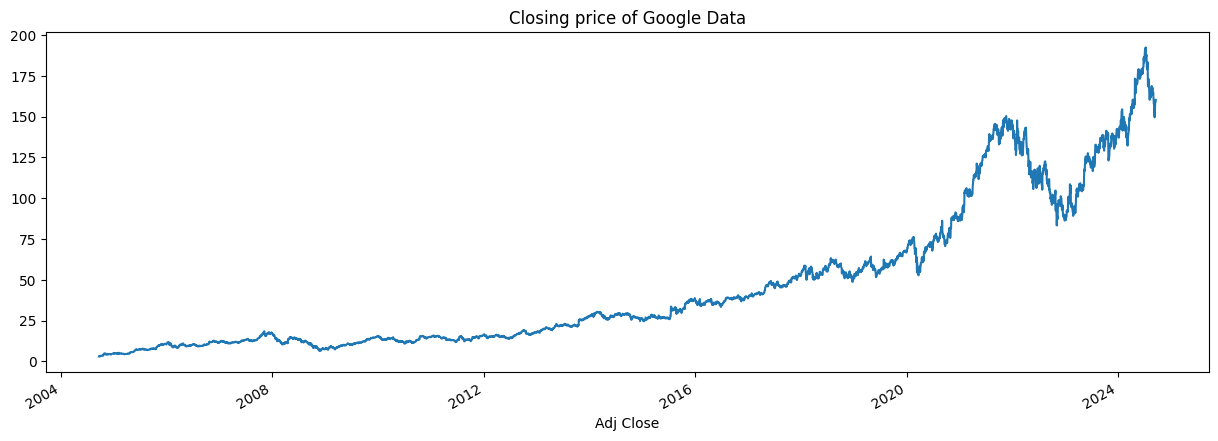

In [12]:
plt.figure(figsize=(15, 5))  
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.xlabel("Adj Close")
plt.title("Closing price of Google Data")

In [13]:
def plot_graph(figsize, values, column_name):
    plt.figure()  
    values.plot(figsize= figsize)
    plt.xlabel("Years")
    plt.xlabel(column_name)
    plt.title(f"{column_name} of Google Data")

In [14]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

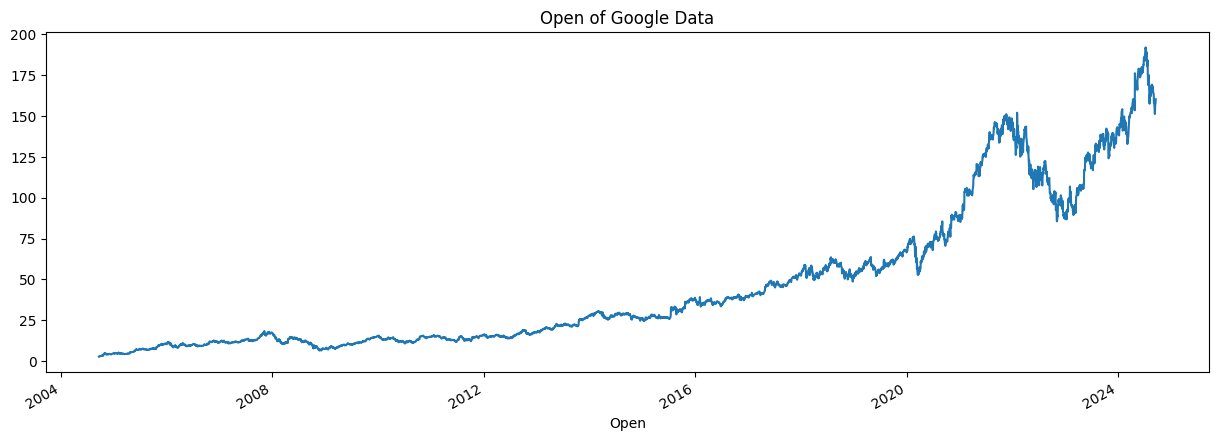

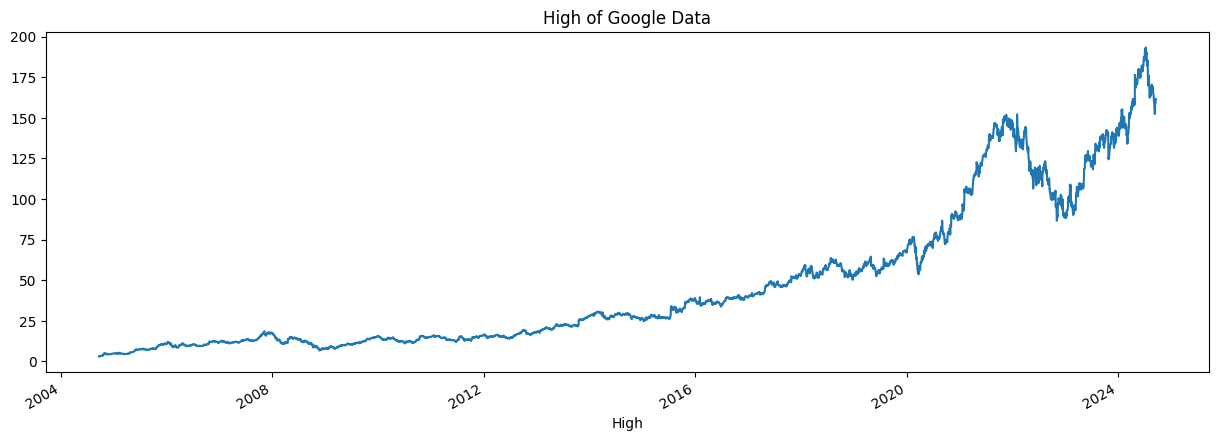

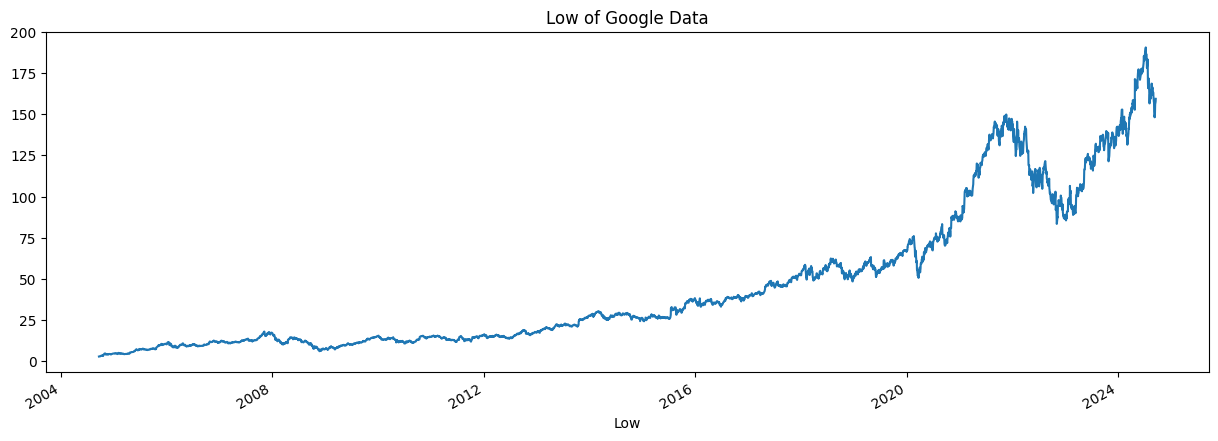

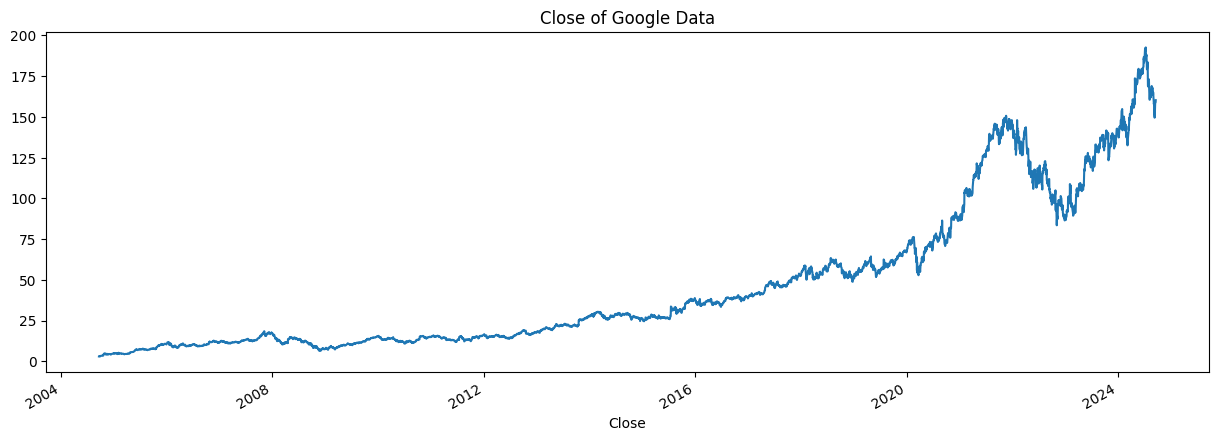

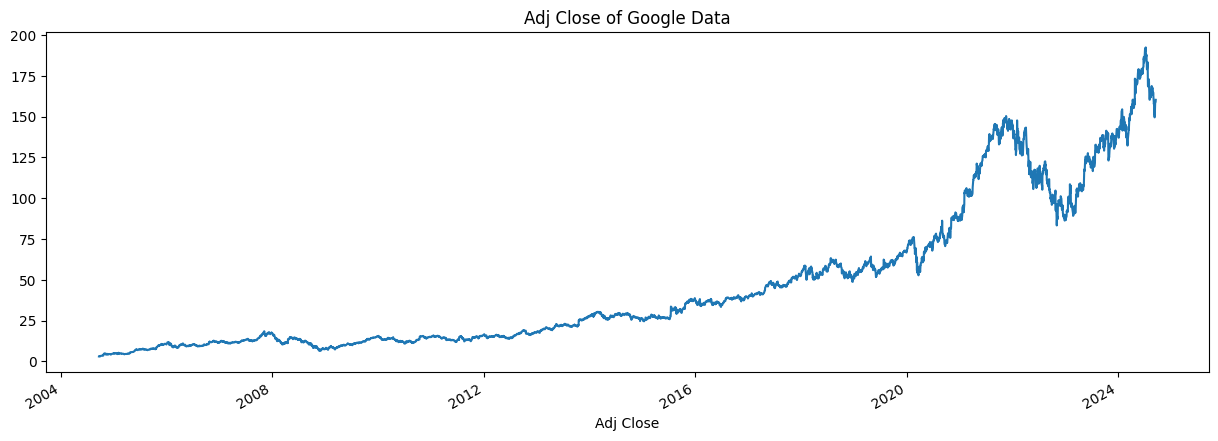

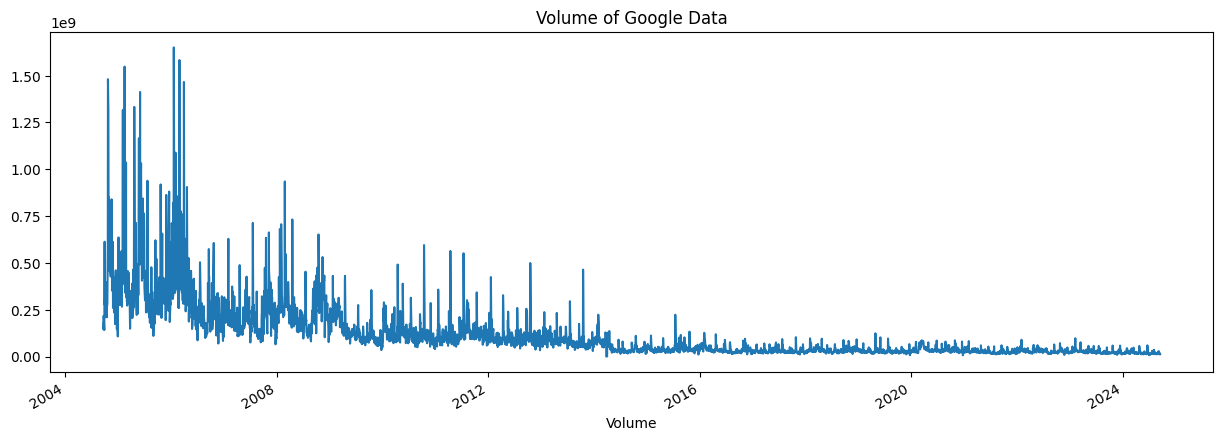

In [15]:
for column in  google_data.columns:
    plot_graph((15,5), google_data[column], column)

In [16]:
# 10, 20, 30 , 40, 50, 60, 70, 80, 90, 100
#concept of moving average
# moving average --> null, null , null, null, null, 50, 40, 30

In [17]:
# temp_data = [10, 20, 30 , 40, 50, 60, 70, 80, 90, 100]
# print(sum(temp_data[:5])/5)
# print(sum(temp_data[1:6])/5)
# print(sum(temp_data[2:7])/5)

In [18]:
import pandas as pd
data = pd.DataFrame([10, 20, 30 , 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
# moving average for 5 days
data.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [20]:
for i in range(2004,2025):
    print(i, list(google_data.index.year).count(i))

2004 73
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 179


In [21]:
google_data['Moving avg for 250 days'] = google_data['Adj Close'].rolling(250).mean()

In [22]:
google_data['Moving avg for 250 days']

Date
2004-09-20           NaN
2004-09-21           NaN
2004-09-22           NaN
2004-09-23           NaN
2004-09-24           NaN
                 ...    
2024-09-11    153.293203
2024-09-12    153.360765
2024-09-13    153.442401
2024-09-16    153.523882
2024-09-17    153.611043
Name: Moving avg for 250 days, Length: 5033, dtype: float64

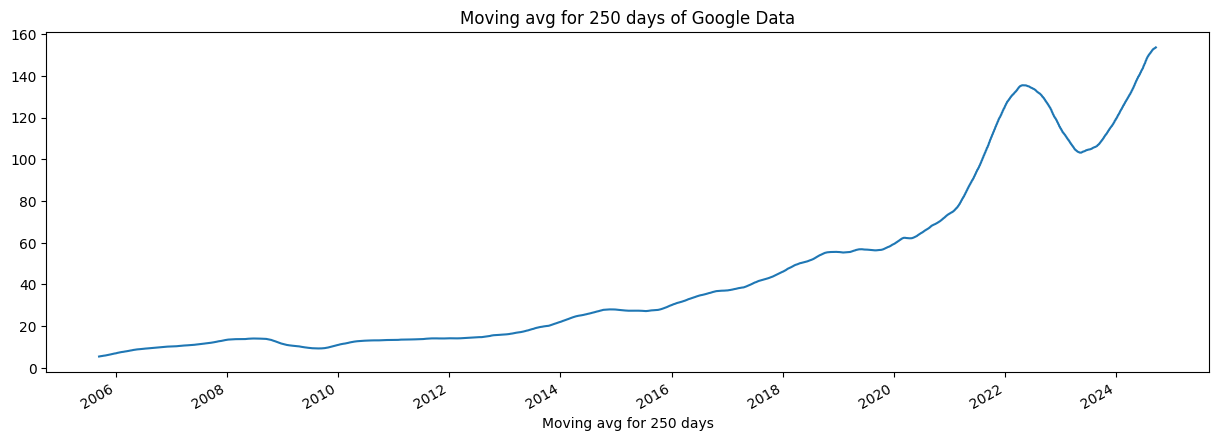

In [23]:
plot_graph((15,5),google_data['Moving avg for 250 days'], 'Moving avg for 250 days')

<Figure size 640x480 with 0 Axes>

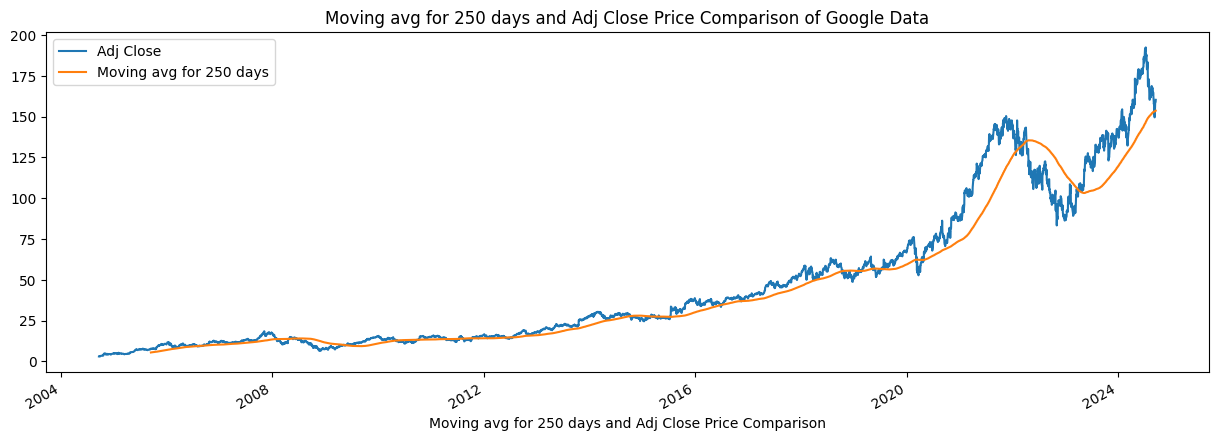

In [24]:
plot_graph((15,5),google_data[['Adj Close','Moving avg for 250 days']], 'Moving avg for 250 days and Adj Close Price Comparison')

<Figure size 640x480 with 0 Axes>

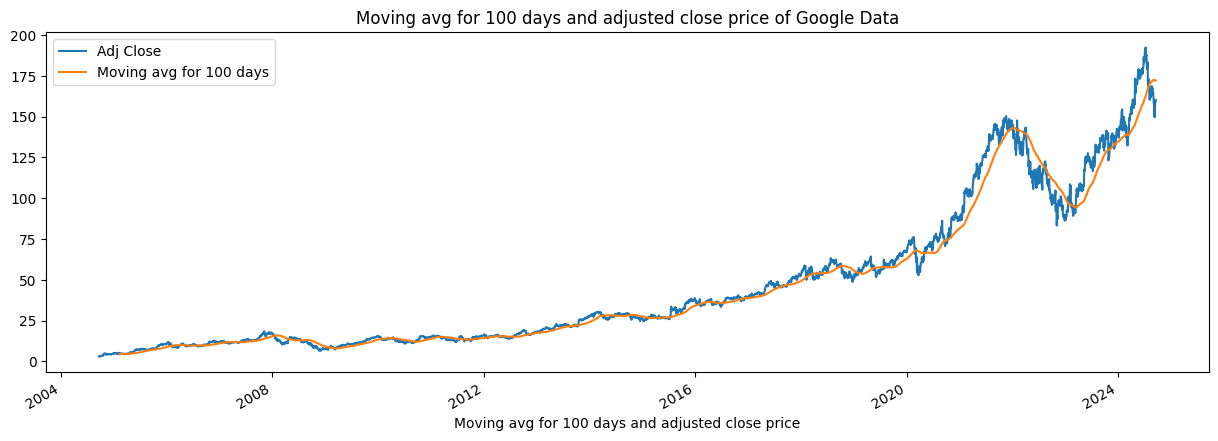

In [25]:
google_data['Moving avg for 100 days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','Moving avg for 100 days']], 'Moving avg for 100 days and adjusted close price')

<Figure size 640x480 with 0 Axes>

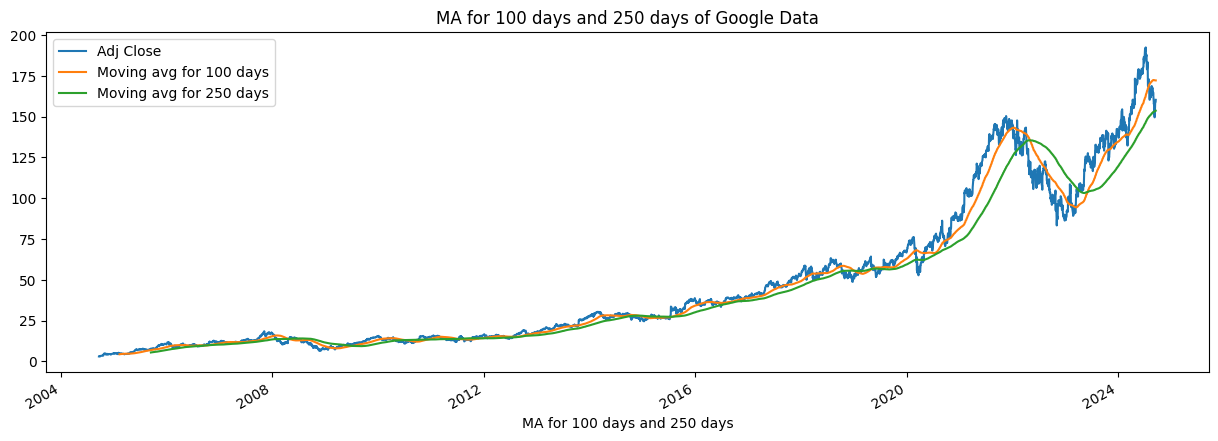

In [26]:
plot_graph((15,5), google_data[['Adj Close','Moving avg for 100 days', 'Moving avg for 250 days']], 'MA for 100 days and 250 days')

In [27]:
google_data['% change in close price'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','% change in close price']].head()

,Adj Close,% change in close price
Date,,
2004-09-20,2.965574,NaN
2004-09-21,2.927809,-0.012735
2004-09-22,2.941225,0.004582
2004-09-23,3.001849,0.020612
2004-09-24,2.977252,-0.008194


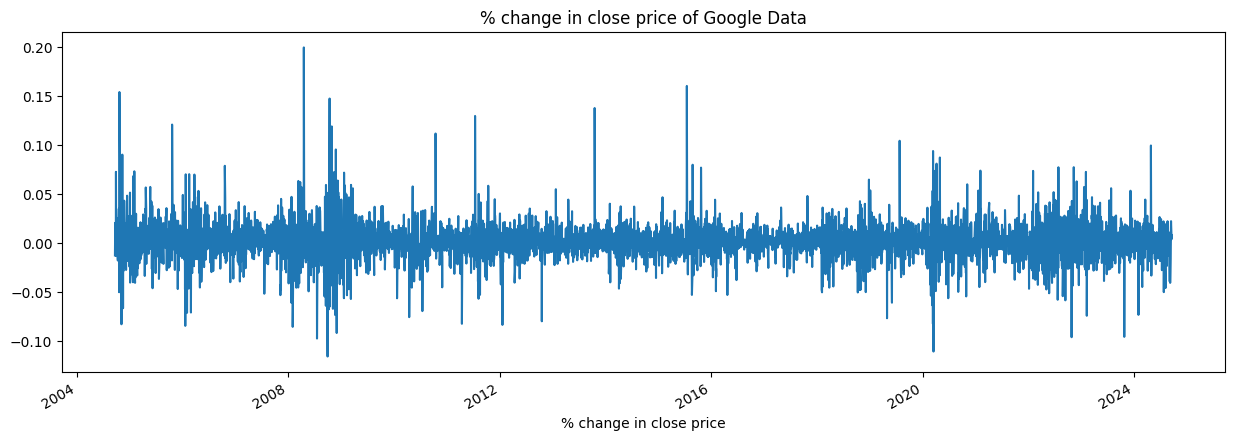

In [28]:
plot_graph((15,5), google_data['% change in close price'], '% change in close price')

In [29]:
Adj_close_price = google_data[['Adj Close']]

In [30]:
max(Adj_close_price.values),min(Adj_close_price.values) 


(array([192.40672302]), array([2.92780876]))

In [31]:
#data Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[1.99311172e-04],
       [0.00000000e+00],
       [7.08049860e-05],
       ...,
       [8.20366672e-01],
       [8.23638859e-01],
       [8.30446969e-01]])

In [32]:
len(scaled_data)

5033

In [33]:
x_data=[]
y_data=[]

# we take data from 1 st row to 100 row to fuin dthe 101 th row data

for i in range (100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [34]:
x_data[0],y_data[0]

(array([[1.99311172e-04],
        [0.00000000e+00],
        [7.08049860e-05],
        [3.90758060e-04],
        [2.60940740e-04],
        [5.50751584e-05],
        [1.18275696e-03],
        [1.73611067e-03],
        [1.54204278e-03],
        [1.93279958e-03],
        [2.25798964e-03],
        [2.69201762e-03],
        [2.52286629e-03],
        [2.75495706e-03],
        [2.60809752e-03],
        [2.28421734e-03],
        [2.56482760e-03],
        [3.02376586e-03],
        [3.16800439e-03],
        [3.44467999e-03],
        [4.10686786e-03],
        [3.94689573e-03],
        [2.97000435e-03],
        [4.13571406e-03],
        [7.15817508e-03],
        [9.12112821e-03],
        [8.38682297e-03],
        [8.93362102e-03],
        [9.89477502e-03],
        [9.54597826e-03],
        [1.02527447e-02],
        [1.01006431e-02],
        [9.68103508e-03],
        [8.76708944e-03],
        [6.75430065e-03],
        [7.17390365e-03],
        [6.66907445e-03],
        [6.55892665e-03],
        [8.5

In [35]:
int (len(x_data)*0.7)

3453

In [36]:
5033-100-int (len(x_data)*0.7)

1480

In [37]:
splitting_len = int (len(x_data)*0.7)

In [38]:
x_train = x_data[:splitting_len]

In [39]:
y_train = y_data[:splitting_len]

In [40]:
x_test = x_data[splitting_len:]

In [41]:
y_test = y_data[splitting_len:]

In [42]:
x_train.shape

(3453, 100, 1)

In [43]:
y_train.shape

(3453, 1)

In [44]:
x_test.shape

(1480, 100, 1)

In [45]:
y_test.shape

(1480, 1)

In [46]:
# nural ntwork model

In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [48]:
model = Sequential()
# 1 st layer
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
# 2 nd layer
model.add(LSTM(64,return_sequences=False))
# dense layer
model.add(Dense(25))
# last layer
model.add(Dense(1))

C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 112s 32ms/step - loss: 3.5614e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 114s 33ms/step - loss: 5.2689e-05


In [51]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [52]:
predictions = model.predict(x_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step


In [54]:
# inverse transfrom
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 50.64385],
       [ 49.46484],
       [ 48.93593],
       ...,
       [136.01787],
       [138.47787],
       [139.87637]], dtype=float32)

In [55]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 50.87905121],
       [ 51.68357468],
       [ 53.70660782],
       ...,
       [158.36999512],
       [158.99000549],
       [160.27999878]])

In [57]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

12.00026487828479

In [58]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-10-29,50.879051,50.643848
2018-10-30,51.683575,49.464840
2018-10-31,53.706608,48.935928
2018-11-01,53.368938,49.619114
2018-11-02,52.759933,50.134701


<Figure size 640x480 with 0 Axes>

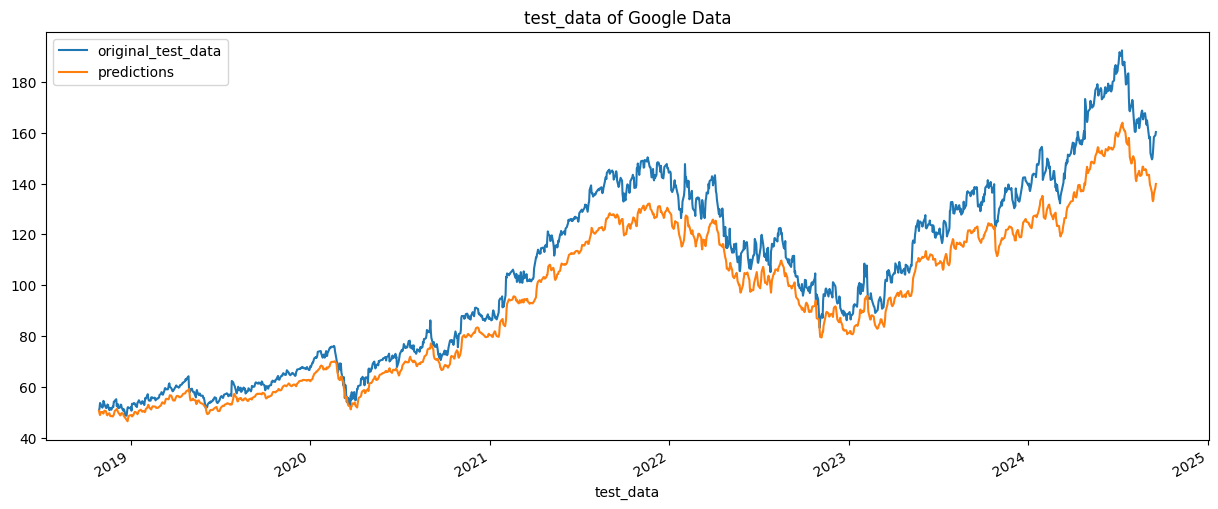

In [60]:
plot_graph((15,6), ploting_data, 'test_data')

<Figure size 640x480 with 0 Axes>

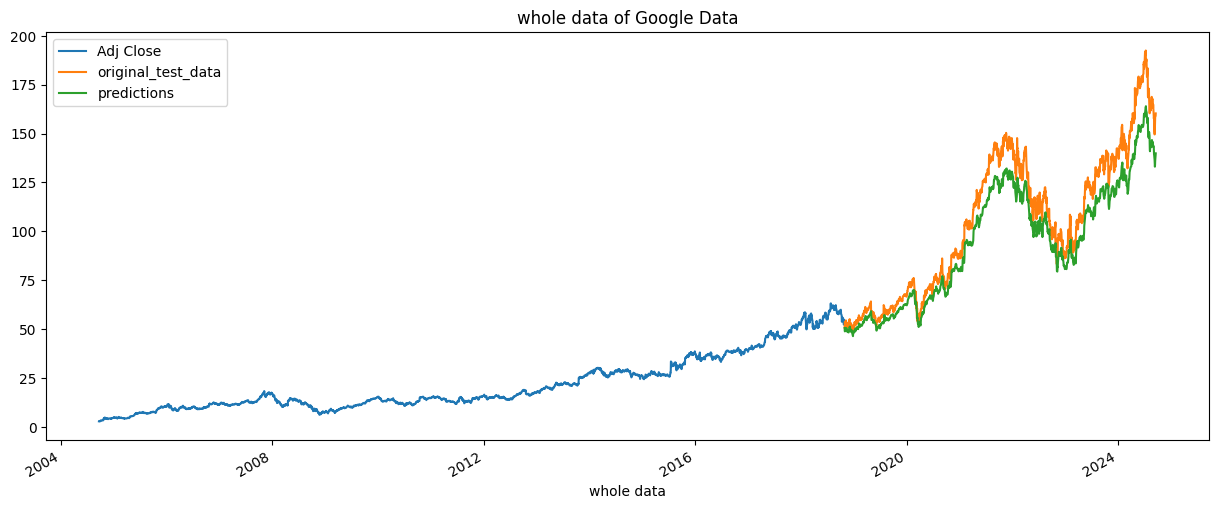

In [61]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [62]:
model.save("Latest_stock_price_model.keras")